# Final Review STOR-120

In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats

# Essential Toolkit

## Table-related Functions

In [ ]:
Table.read_table(filename) 
Table().where(), Syntax: x.where(column名, are.predicate(value)) #还有between_or_equal_to, strictly between, not_between这种玩法
Table().with_column() #加单个colum
Table().with_columns() #制造新的表格或者加多个column
table.num_rows
Table().num_columns
Table().show(int), #Int = num of rows u want to show
Table().sort(column_name) #默认ascending，除非加descending = True
Table().select()
Table().drop()
Table().take(array_num) ##array_num是所需要行数的array
Table().group(column_name, x), #x can be a numpy function, or nothing), ##没有的话默认取count
也可以.group([column1, column2], np), 用两个来group
Table().relabel(a or int, b) ##rename a as b
Table().bin(column_name, bins = A) ##A is the bins created, can use np.arange
Table().apply(column_name, function_name)
table.pivot(y, x, values = 想算的量, collect = np.average/max) #算的东西 ) ##不写后两个默认是count

## Arrary-related Functions

In [ ]:
make_array(contents)
np.arrange(start, stop, step)
Arrary_name[index]  ##where index starts from 0 ! 这玩意儿不让用
array.item(index), 同上

STR.join(arrary) ##STR是隔开每一个element的分隔符，arrary是要被join的arrary
len(arrary)
np.diff() ##算每一个element相隔的差
np.cumsum() ##叠加
np.average
np.nanmean ## 如果有null number存在
## Note: String组成的arrary不能做运算，单独的string可以

## Plot-related Functions

In [ ]:
Table().plot(x, y) ## y可以以（a, b, c）的方式来实现多条线
Table().barh(x, y)
Table().scatter(x, y, group = 可以带group)
Table().hist(column_name, bins = 可以自定义bins)
plot.title()
plots.plot([x_lower, x_upper], [y_lower, y_upper], color = color, lw = int(width))

## Other Functions

In [ ]:
string.replace(a, b) ## a为被替换掉的内容，b为替换内容

# Test Hypothesis

## Step 1 Choose our Null Hypothesis and Alternative Hypothesis

Null Hypothesis: need an exact probaility to test with.

Alternative Hypothesis: that we reject that probability.

## Step 2 Choose the appropriate test statistics and compute the function

Normally we use median, averages, or sometimes the absolute distance between our theoretical value and the real value as our test statistics. 

In [ ]:
def test_statistics1(value):
    return np.average(value)

def test_statistics2(value):
    return np.median(value)

def test_statistics2(value):
    theo_value = 0
    return abs(value - theo_value)

We may also use TVD, or The total variation distance (TVD) between probability distribution, as our test statistics. This occurs when we have multiple variables in our dataset.

In [ ]:
def tvd(distribution_1, distribution_2):
    return sum(abs(distribution_1 - distribution_2))/2

We will want to calculate the observed statistic first.

## Step 3 Run Simulations

We will then start simulations, there're different cases that we can set up the simulation function.

In [ ]:
# How far is each simulated percentage/proportion from the model proportion of 75%?

def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, make_array(0.75, 0.25)).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

Using TVD

In [ ]:
def one_simulation():
    one_sample = sample_proportions(toyota.num_rows, Year.column("Proportion"))
    return tvd(Year.column(1), one_sample)   

We will run the simulation repetitively

In [ ]:
differences = make_array()

for i in np.arange(500):
    new_difference = one_simulation()
    differences = np.append(differences, new_difference)

## Step 4 Graph and make conclusion

We will then plot all the data and make conclusion based on the p-value

In [ ]:
Table().with_column('TVD', differences).hist()
plots.title('Prediction Under the Null Hypothesis')
plots.plot([observed_tvd, observed_tvd], [0, 5], color='red', lw=2)

In [ ]:
p_value = sum(differences >= observed_tvd)/500
p_value

When p_value is less than 0.05 (The conventional cut-off), we will reject the null hypothesis.

When p_value is bigger than 0.05, we fail to reject the null hypothesis and will say that the observed statistic is statistically significant. 

**An example of conclusion:**

With the p-value(0.0) less than a p-value cutoff(say, of 0.05), we reject the hull hypothesis that contains the claim of the manager of the car dealership. Thus, the simulation based on the data analyzed provides sufficient evidence in favor of the claim that the sample proportions of used Toyota cars by year of manufacture `does not` show that the data is a random sample drawn from a population having the proportions claimed by the manager.

# Confidence Interval

In [ ]:
toyo_car = make_array()

for i in np.arange(5000): # Number of simulations required.
    bootstrap = toyota.sample() # take bootstrap samples from the original sample
    bootstrap_median =np.median(bootstrap.column('Price')) # find your bootstrap statistic, repeat 5000 times
    toyo_car = np.append(toyo_car, bootstrap_median)
    
lower_bound = percentile(5, toyo_car) # determine the lower bound of the confidence interval. 
upper_bound = percentile(95, toyo_car) # determine the upper bound of the confidence interval. 

lower_bound, upper_bound # Output the bounds of the confidence interval.

(9750.0, 9950.0)

We predict with 90% confidence that if samples are randomly drawn,
the unknown median price of all used cars lies between 9750.0 and 9950.0 Euros


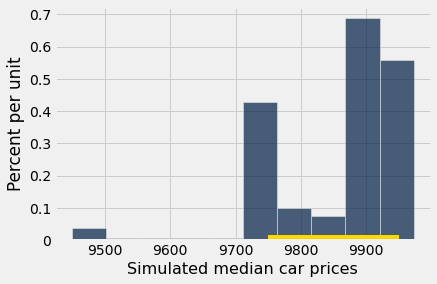

In [ ]:
Table().with_column(
    'Simulated median car prices', toyo_car
).hist()

plots.plot([lower_bound, upper_bound], [0,0], color="gold", lw=10, zorder=1);
print("We predict with 90% confidence that if samples are randomly drawn,")
print("the unknown median price of all used cars lies between", np.round(lower_bound,2), "and", np.round(upper_bound,2), "Euros")

# AB Testing

## Step 1 Setting up the Null hypothesis and Alternative hypothesis

**Null Hypothesis:**

In the population, the distribution of label1 is the same for label 2. The difference in the sample is due to chance.

**Alternative Hypothesis:**

In the population, the distributions are not the same for the two labels.

## Step 2: Define The Test Statistic and Compute the Observed Value of the Test Statistic

Same for the one did in Test Hypothesis

## Step 3: Apply the Permutation Test

In [ ]:
table.with_column('Shuffled', table.sample(with_replacement = False).column(0))

In [ ]:
def one_simulated_difference(table, num_var, categ_var):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(categ_var)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(num_var).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, num_var, 'Shuffled Label')   
differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

p_value = sum(differences >= observed_difference) / 5000

## Step 4: Apply Plotting

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([observed_difference, observed_difference], [0, .35], color='red', lw=2);

## Step 5: Compute the p-value and Make conclusion

In [ ]:
p_value = sum(differences >= observed_difference) / len(differences)
p_value

**An Example for Conclusion**

The p-value is equal to 0.0. Under the null hypothesis, the mean price of used, sports-model Toyota cars is about the same as those that are not sports-model. The alternative hypothesis is the hypothesis that the mean price of used, sports-model Toyota cars is higher than those that are not sports-model.

Because the p_value is very small, the observed value of the test statistic is quite far away from the heart of the simulated distribution centered at 0. By any reasonable cutoff(a p-value cutoff of 0.01 or 0.05) for what is “small”, the empirical P-value is small. So we end up rejecting the null hypothesis of randomness, and conclude the difference between the mean price of used, sports-model Toyota cars and non sports-model Toyota cars is too large to reflect chance variation alone.

# Regression

In [ ]:
# Some utility functions for plotting and illustrating some concepts in class.
# You don't have to necessarily memorize these functions in this cell, 
# since they use things we may not have learned about in STOR 120


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Compute Correlation (r)

In [1]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

## Compute Slope and Intercept for the regression line

In [ ]:
def slope(t, x, y):
    """t is a table; x and y are column labels"""
    r = correlation(t, x, y)
    slope_xy = r * np.std(t.column(y)) / np.std(t.column(x))
    return slope_xy

In [ ]:
def intercept(t, x, y):
    """t is a table; x and y are column labels"""
    slope_xy = slope(t, x, y)
    intercept_xy = np.average(t.column(y) - slope_xy * np.average(t.column(x)))
    return intercept_xy

In [ ]:
def fitted_values(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

## Compute RMSE and minimze RMSE

In [ ]:
# Define the RMSE function

def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

## Confidence Interval for Prediction ##

In [ ]:
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')') 

In [ ]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

In [ ]:
minimize(demographics_rmse)

## Inference for the Slope ##

In [ ]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [ ]:
slope(births, 'Gestational Days', 'Birth Weight')

In [ ]:
def bootstrap_slope(t, x, y, repetitions=1000):
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(left, 'to', right)

In [ ]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight')

# Classifier

## Review of the Steps in constructing Classifier ##

- `distance(pt1, pt2)`: Returns the distance between the arrays `pt1` and `pt2`
- `row_distance(row1, row2)`: Returns the distance between the rows `row1` and `row2`
- `distances(training, example)`: Returns a table that is `training` with an additional column `'Distance'` that contains the distance between `example` and each row of `training`
- `closest(training, example, k)`: Returns a table of the rows corresponding to the k smallest distances 
- `majority_class(topk)`: Returns the majority class in the `'Class'` column
- `classify(training, example, k)`: Returns the predicted class of `example` based on a `k` nearest neighbors classifier using the historical sample `training`

In [ ]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(list(new_point)), np.array(list(row)))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows